In [3]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
june = pd.read_csv('data/spotify_june2019.csv')
june.head()

,Date,Position,Artist,Streams,Country,Date2,Title,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,Unnamed..0,title
0,2019-06-07,1,Avicii,412907,Sweden,2019-06-07,Heaven,0.748,0.258,7,...,audio_features,7e9QE1vqclPjl0TEs2uxv6,spotify:track:7e9QE1vqclPjl0TEs2uxv6,https://api.spotify.com/v1/tracks/7e9QE1vqclPj...,https://api.spotify.com/v1/audio-analysis/7e9Q...,112927,4,Underground Rap,NaN,NaN
1,2019-06-07,1,Avicii,412907,Sweden,2019-06-07,Heaven,0.519,0.955,1,...,audio_features,1DmLlPEKT79nAXC8J1mXfC,spotify:track:1DmLlPEKT79nAXC8J1mXfC,https://api.spotify.com/v1/tracks/1DmLlPEKT79n...,https://api.spotify.com/v1/audio-analysis/1DmL...,215760,4,RnB,NaN,NaN
2,2019-06-08,1,Billie Eilish,245264,Australia,2019-06-08,bad guy,0.701,0.425,7,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,Pop,NaN,NaN
3,2019-06-02,1,Billie Eilish,4788,Latvia,2019-06-02,bad guy,0.701,0.425,7,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,Pop,NaN,NaN
4,2019-06-04,1,Billie Eilish,5681,Estonia,2019-06-04,bad guy,0.701,0.425,7,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,Pop,NaN,NaN


In [44]:
june_grouped=june.groupby(['Country']).mean()
june_grouped

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed..0,title
Country,,,,,,,,,,,,,,,,,
Argentina,108.347305,40676.207948,0.676707,0.579919,4.786064,-7.163733,0.674469,0.109480,0.257105,0.067553,0.173236,0.423542,153.893182,210477.132281,3.924333,NaN,NaN
Australia,104.043706,51633.417764,0.698594,0.600252,4.931246,-6.718895,0.620831,0.132742,0.239568,0.040624,0.174632,0.430022,148.268357,208111.924089,3.983770,NaN,NaN
Austria,108.666562,7997.103057,0.699453,0.609601,5.840214,-6.651115,0.591869,0.132898,0.241716,0.064974,0.170697,0.436742,149.481192,194825.786322,3.983612,NaN,NaN
Belgium,108.058648,11039.809108,0.691866,0.590516,5.348896,-6.598304,0.577967,0.131102,0.260051,0.056351,0.178089,0.412002,144.968920,201599.504600,3.982291,NaN,NaN
Bolivia,123.185185,2436.722801,0.659860,0.576069,4.232060,-7.073698,0.625000,0.105108,0.253995,0.062562,0.153766,0.433640,152.578966,213057.065394,3.928819,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,120.408032,27962.569478,0.709390,0.594614,5.248193,-6.108369,0.551004,0.112187,0.240199,0.090026,0.154732,0.437615,139.133524,202374.293173,4.000000,NaN,NaN
United Kingdom,103.863346,97813.604406,0.690146,0.604343,5.394157,-6.810981,0.594987,0.146558,0.211339,0.036277,0.170771,0.427813,147.018061,203086.611750,4.006066,NaN,NaN
United States,95.473948,394824.239965,0.735773,0.594864,5.377896,-6.775312,0.593821,0.161231,0.201604,0.019085,0.176275,0.448334,144.710638,194962.232351,4.000218,NaN,NaN


In [45]:
june_flat = june_grouped.reset_index()
june_flat

,Country,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed..0,title
0,Argentina,108.347305,40676.207948,0.676707,0.579919,4.786064,-7.163733,0.674469,0.109480,0.257105,0.067553,0.173236,0.423542,153.893182,210477.132281,3.924333,NaN,NaN
1,Australia,104.043706,51633.417764,0.698594,0.600252,4.931246,-6.718895,0.620831,0.132742,0.239568,0.040624,0.174632,0.430022,148.268357,208111.924089,3.983770,NaN,NaN
2,Austria,108.666562,7997.103057,0.699453,0.609601,5.840214,-6.651115,0.591869,0.132898,0.241716,0.064974,0.170697,0.436742,149.481192,194825.786322,3.983612,NaN,NaN
3,Belgium,108.058648,11039.809108,0.691866,0.590516,5.348896,-6.598304,0.577967,0.131102,0.260051,0.056351,0.178089,0.412002,144.968920,201599.504600,3.982291,NaN,NaN
4,Bolivia,123.185185,2436.722801,0.659860,0.576069,4.232060,-7.073698,0.625000,0.105108,0.253995,0.062562,0.153766,0.433640,152.578966,213057.065394,3.928819,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Turkey,120.408032,27962.569478,0.709390,0.594614,5.248193,-6.108369,0.551004,0.112187,0.240199,0.090026,0.154732,0.437615,139.133524,202374.293173,4.000000,NaN,NaN
58,United Kingdom,103.863346,97813.604406,0.690146,0.604343,5.394157,-6.810981,0.594987,0.146558,0.211339,0.036277,0.170771,0.427813,147.018061,203086.611750,4.006066,NaN,NaN
59,United States,95.473948,394824.239965,0.735773,0.594864,5.377896,-6.775312,0.593821,0.161231,0.201604,0.019085,0.176275,0.448334,144.710638,194962.232351,4.000218,NaN,NaN
60,Uruguay,107.720392,2933.776454,0.663212,0.577698,4.733006,-7.129076,0.655221,0.105867,0.240506,0.079046,0.161915,0.414345,154.588296,214938.381219,3.911002,NaN,NaN


In [46]:
# remove 'Global' row
june_flat = june_flat[june_flat.Country != 'Global']
june_flat.shape

(61, 18)

In [47]:
## subset it
columns_to_keep = ['Country',
 'Streams',                   
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']
june_flat = june_flat[columns_to_keep]
june_flat

,Country,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Argentina,40676.207948,0.676707,0.579919,4.786064,-7.163733,0.674469,0.109480,0.257105,0.067553,0.173236,0.423542,153.893182,210477.132281,3.924333
1,Australia,51633.417764,0.698594,0.600252,4.931246,-6.718895,0.620831,0.132742,0.239568,0.040624,0.174632,0.430022,148.268357,208111.924089,3.983770
2,Austria,7997.103057,0.699453,0.609601,5.840214,-6.651115,0.591869,0.132898,0.241716,0.064974,0.170697,0.436742,149.481192,194825.786322,3.983612
3,Belgium,11039.809108,0.691866,0.590516,5.348896,-6.598304,0.577967,0.131102,0.260051,0.056351,0.178089,0.412002,144.968920,201599.504600,3.982291
4,Bolivia,2436.722801,0.659860,0.576069,4.232060,-7.073698,0.625000,0.105108,0.253995,0.062562,0.153766,0.433640,152.578966,213057.065394,3.928819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Turkey,27962.569478,0.709390,0.594614,5.248193,-6.108369,0.551004,0.112187,0.240199,0.090026,0.154732,0.437615,139.133524,202374.293173,4.000000
58,United Kingdom,97813.604406,0.690146,0.604343,5.394157,-6.810981,0.594987,0.146558,0.211339,0.036277,0.170771,0.427813,147.018061,203086.611750,4.006066
59,United States,394824.239965,0.735773,0.594864,5.377896,-6.775312,0.593821,0.161231,0.201604,0.019085,0.176275,0.448334,144.710638,194962.232351,4.000218
60,Uruguay,2933.776454,0.663212,0.577698,4.733006,-7.129076,0.655221,0.105867,0.240506,0.079046,0.161915,0.414345,154.588296,214938.381219,3.911002


In [48]:
world = gpd.read_file('data/world.geojson')

# current columns as a list
world.columns.to_list()

# rename
world.columns = ['FID', 'Country', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'geometry']
world.head(6)

,FID,Country,ISO,COUNTRYAFF,AFF_ISO,geometry
0,1,American Samoa,AS,United States,US,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
5,6,Pitcairn,PN,United Kingdom,GB,"MULTIPOLYGON (((-128.33222 -24.32726, -128.326..."


In [49]:
gdp = pd.read_csv('data/GDPpercap.csv')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   WEO Country Code  194 non-null    object
 1   ISO               193 non-null    object
 2   Country           193 non-null    object
 3   2019              193 non-null    object
 4   2020              192 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


In [50]:
jdf = pd.merge(pd.merge(june_flat,world,on='Country'),gdp,on='Country')
jdf = jdf.dropna(how='any',axis=0) 
jdf

,Country,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,time_signature,FID,ISO_x,COUNTRYAFF,AFF_ISO,geometry,WEO Country Code,ISO_y,2019,2020
0,Argentina,40676.207948,0.676707,0.579919,4.786064,-7.163733,0.674469,0.109480,0.257105,0.067553,...,3.924333,15,AR,Argentina,AR,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...",213,ARG,"9,890.31","8,433.04"
1,Australia,51633.417764,0.698594,0.600252,4.931246,-6.718895,0.620831,0.132742,0.239568,0.040624,...,3.983770,218,AU,Australia,AU,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",193,AUS,"54,348.23","51,885.47"
2,Austria,7997.103057,0.699453,0.609601,5.840214,-6.651115,0.591869,0.132898,0.241716,0.064974,...,3.983612,165,AT,Austria,AT,"POLYGON ((10.47124 46.87135, 10.48821 46.93599...",122,AUT,"50,380.28","48,634.34"
3,Belgium,11039.809108,0.691866,0.590516,5.348896,-6.598304,0.577967,0.131102,0.260051,0.056351,...,3.982291,160,BE,Belgium,BE,"POLYGON ((4.14924 49.97837, 4.14722 50.00999, ...",124,BEL,"46,236.67","43,813.77"
4,Bolivia,2436.722801,0.659860,0.576069,4.232060,-7.073698,0.625000,0.105108,0.253995,0.062562,...,3.928819,20,BO,Bolivia,BO,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5...",218,BOL,"3,566.42","3,321.92"
5,Brazil,105225.830370,0.699637,0.557919,4.628889,-6.627357,0.694815,0.096046,0.268008,0.063767,...,3.941481,21,BR,Brazil,BR,"MULTIPOLYGON (((-44.69501 -1.81778, -44.64001 ...",223,BRA,"8,751.38","6,450.45"
6,Bulgaria,1513.839109,0.742604,0.590042,5.259901,-6.212888,0.645215,0.129914,0.180040,0.027612,...,3.999175,183,BG,Bulgaria,BG,"POLYGON ((22.93560 41.34213, 22.95590 41.35562...",918,BGR,"9,772.15","9,826.14"
7,Canada,56293.913731,0.733903,0.606941,5.404133,-6.594242,0.610659,0.157274,0.196294,0.021752,...,3.994919,14,CA,Canada,CA,"MULTIPOLYGON (((-87.03528 65.47915, -87.06368 ...",156,CAN,"46,271.72","42,080.05"
8,Chile,37530.278448,0.647819,0.577411,4.798276,-7.054057,0.523276,0.120716,0.223144,0.058625,...,3.925000,17,CL,Chile,CL,"MULTIPOLYGON (((-73.04210 -43.73384, -73.04640...",228,CHL,"14,772.11","12,612.32"
9,Colombia,12200.674832,0.688189,0.588009,4.707900,-6.630259,0.554807,0.110839,0.240584,0.044194,...,3.951623,38,CO,Colombia,CO,"MULTIPOLYGON (((-74.86081 11.12549, -74.83459 ...",233,COL,"6,423.18","5,207.24"


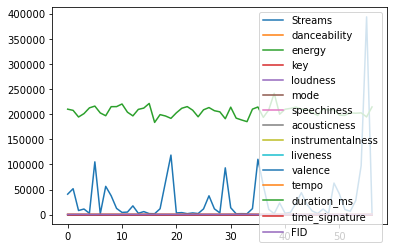

In [51]:
jdf[].plot()

In [17]:
type(jdf)

pandas.core.frame.DataFrame